In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
# Load the dataset
df = pd.read_csv("creditcard.csv")



In [2]:
# !pip install imblearn

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
print(df[df["Class"]==1].iloc[0])

Time      406.000000
V1         -2.312227
V2          1.951992
V3         -1.609851
V4          3.997906
V5         -0.522188
V6         -1.426545
V7         -2.537387
V8          1.391657
V9         -2.770089
V10        -2.772272
V11         3.202033
V12        -2.899907
V13        -0.595222
V14        -4.289254
V15         0.389724
V16        -1.140747
V17        -2.830056
V18        -0.016822
V19         0.416956
V20         0.126911
V21         0.517232
V22        -0.035049
V23        -0.465211
V24         0.320198
V25         0.044519
V26         0.177840
V27         0.261145
V28        -0.143276
Amount     -0.353229
Class       1.000000
Hour        0.000000
Name: 541, dtype: float64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Missing Value Analysis
print("Missing Values:")
df.isnull().sum()

Missing Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


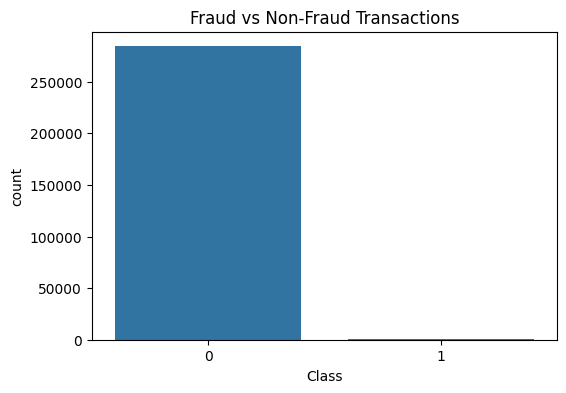

In [7]:


# Class Distribution
print("Class Distribution:")
print(df['Class'].value_counts(normalize=True))
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

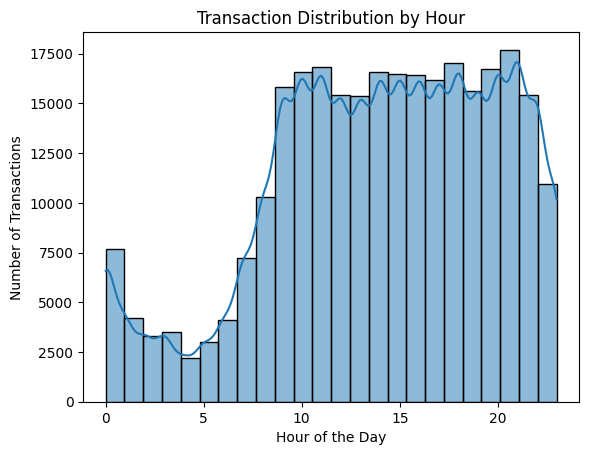

In [8]:
# Feature Engineering on Time
# Convert seconds into hours of the day

df['Hour'] = (df['Time'] // 3600) % 24  # Extracting hour of transaction
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Transaction Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.show()

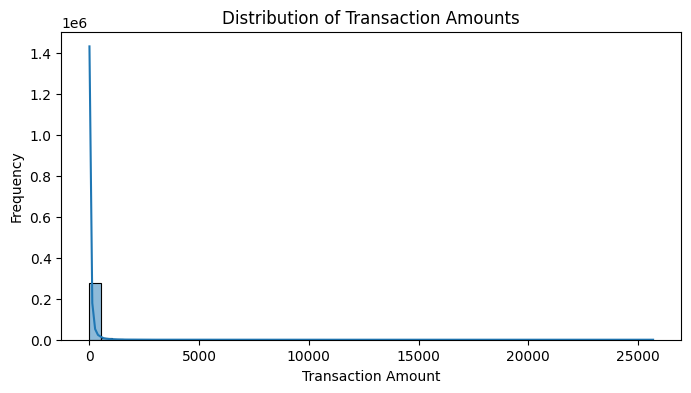

In [9]:


# Distribution of Transaction Amount
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

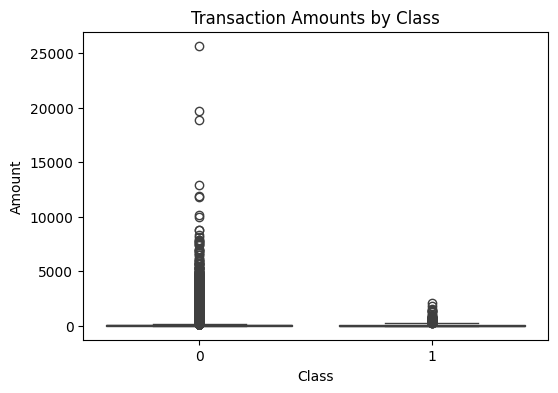

In [10]:
# Boxplot for Amount by Class
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts by Class")
plt.show()

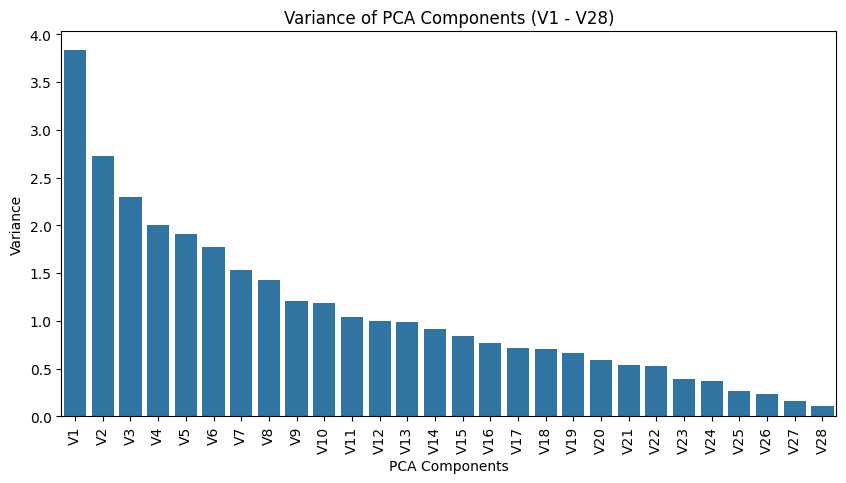

In [11]:
explained_variance = df.iloc[:, 1:29].var().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=explained_variance.index, y=explained_variance.values)
plt.title("Variance of PCA Components (V1 - V28)")
plt.xlabel("PCA Components")
plt.ylabel("Variance")
plt.xticks(rotation=90)
plt.show()


In [12]:
explained_variance.values

array([3.83648925, 2.72682002, 2.29902924, 2.00468382, 1.90508105,
       1.77494626, 1.53040057, 1.42647886, 1.20699247, 1.18559381,
       1.04185508, 0.99840342, 0.99057079, 0.91890555, 0.8378034 ,
       0.76781912, 0.72137345, 0.70253936, 0.66266194, 0.59432539,
       0.53952553, 0.52664275, 0.38995066, 0.36680837, 0.27173083,
       0.23254289, 0.16291919, 0.10895496])

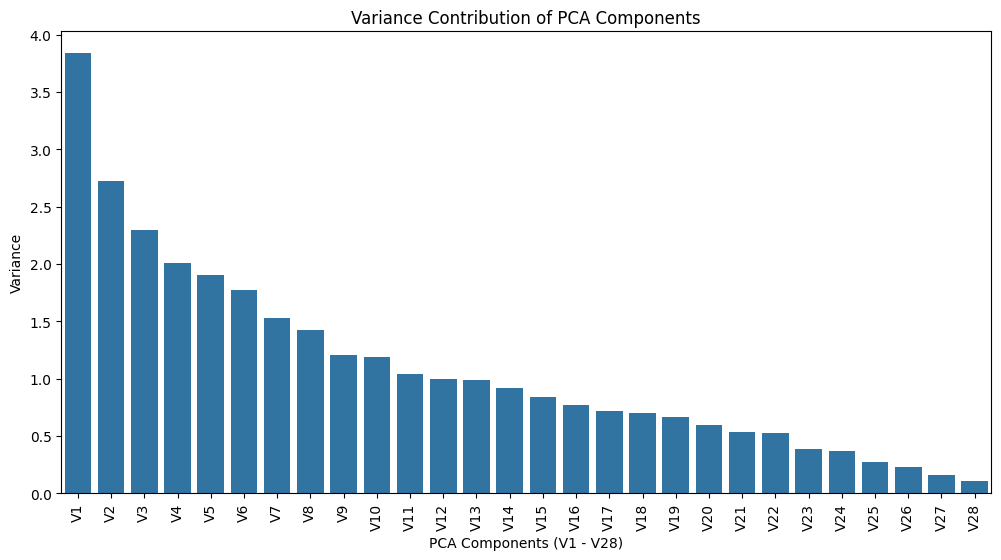

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_variance = [3.836, 2.727, 2.299, 2.005, 1.905, 1.775, 1.530, 1.426, 1.207, 1.186, 
                1.042, 0.998, 0.991, 0.919, 0.838, 0.768, 0.721, 0.703, 0.663, 0.594, 
                0.540, 0.527, 0.390, 0.367, 0.272, 0.233, 0.163, 0.109]

plt.figure(figsize=(12, 6))
sns.barplot(x=[f"V{i+1}" for i in range(len(pca_variance))], y=pca_variance)
plt.xticks(rotation=90)
plt.xlabel("PCA Components (V1 - V28)")
plt.ylabel("Variance")
plt.title("Variance Contribution of PCA Components")
plt.show()


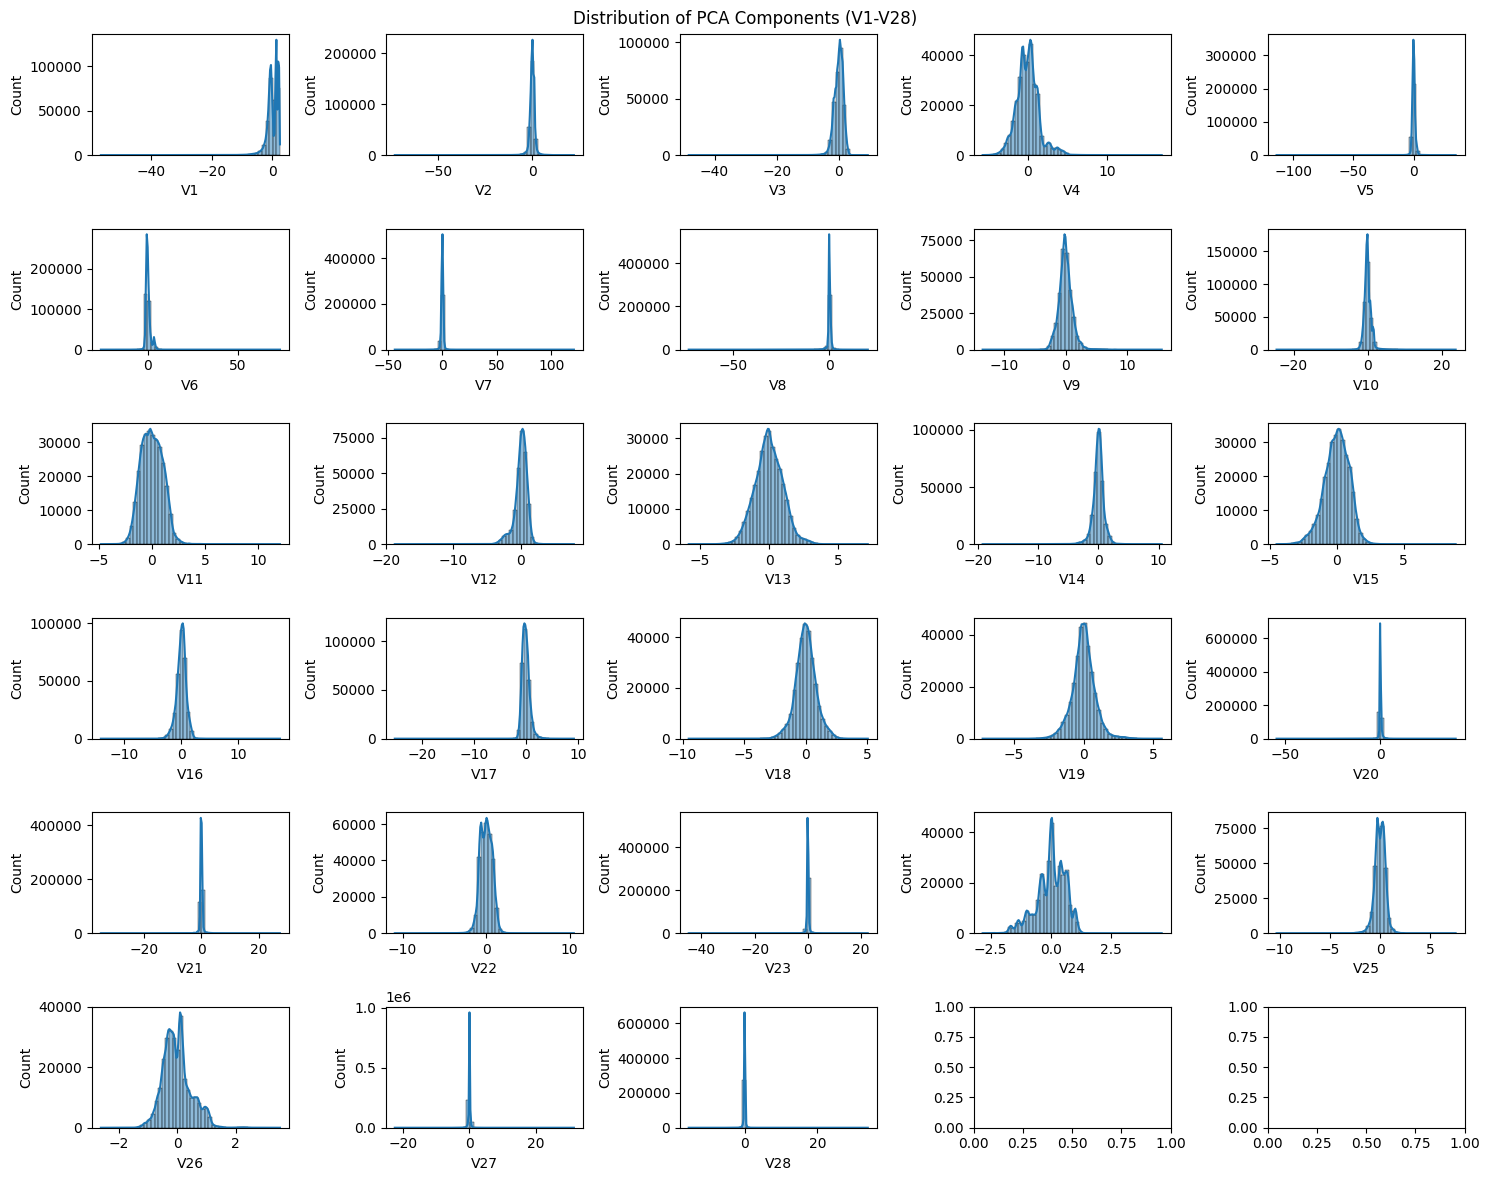

In [14]:
# Distribution of PCA Components
fig, axes = plt.subplots(6, 5, figsize=(15, 12))
fig.suptitle("Distribution of PCA Components (V1-V28)")
axes = axes.flatten()
for i, col in enumerate(df.columns[1:29]):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


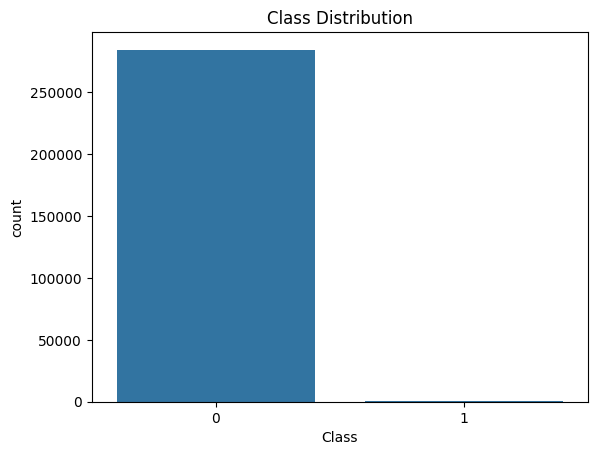

In [15]:
# Check class imbalance
print(df['Class'].value_counts(normalize=True))

# Plot class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [16]:

# Feature Scaling
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [17]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0,23.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0,23.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0,23.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0,23.0


In [18]:
df["Hour"].max()

np.float64(23.0)

In [19]:
df["Hour"].min()

np.float64(0.0)

In [20]:
df["Hour"].value_counts()

Hour
21.0    17703
18.0    17039
11.0    16856
20.0    16756
10.0    16598
14.0    16570
15.0    16461
16.0    16453
17.0    16166
9.0     15838
19.0    15649
22.0    15441
12.0    15420
13.0    15365
23.0    10938
8.0     10276
0.0      7695
7.0      7243
1.0      4220
6.0      4101
3.0      3492
2.0      3328
5.0      2990
4.0      2209
Name: count, dtype: int64

In [21]:
hourly_counts = df.groupby("Hour")["Class"].value_counts().unstack()
hourly_counts.columns = ["Non-Fraud (0)", "Fraud (1)"]  # Rename columns for clarity

print(hourly_counts)


      Non-Fraud (0)  Fraud (1)
Hour                          
0.0            7689          6
1.0            4210         10
2.0            3271         57
3.0            3475         17
4.0            2186         23
5.0            2979         11
6.0            4092          9
7.0            7220         23
8.0           10267          9
9.0           15822         16
10.0          16590          8
11.0          16803         53
12.0          15403         17
13.0          15348         17
14.0          16547         23
15.0          16435         26
16.0          16431         22
17.0          16137         29
18.0          17006         33
19.0          15630         19
20.0          16738         18
21.0          17687         16
22.0          15432          9
23.0          10917         21


Key Observations:
Fraud Occurs More During Off-Peak Hours

The highest fraud counts occur around 2 AM (57 frauds) and 11 AM (53 frauds).
Fraud is relatively lower during regular working hours (9 AM - 5 PM).
Most Transactions Are Non-Fraudulent

As expected, non-fraud transactions dominate every hour.
However, fraudulent transactions do not follow the same pattern as non-fraud transactions.
Potential Fraud Patterns

The ratio of fraud to non-fraud seems to fluctuate.
Some late-night hours (like 2 AM) have a higher fraud count compared to other hours.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

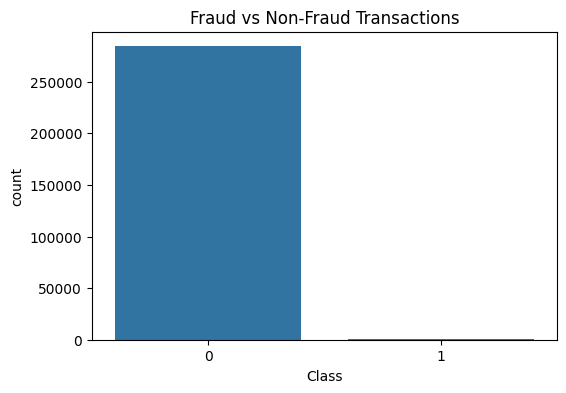

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Data Overview
print(df.head())
print(df.info())
print(df.describe())

# Missing Value Analysis
print("Missing Values:")
print(df.isnull().sum())

# Class Distribution
print("Class Distribution:")
print(df['Class'].value_counts(normalize=True))
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Feature Engineering on Time
# Convert seconds into hours of the day
df['Hour'] = (df['Time'] // 3600) % 24  # Extracting hour of transaction

# Scaling Amount
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])



In [23]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Select all features except the target variable
features = df.drop(columns=['Class', 'Time'])  
labels = df['Class']

# Apply ANOVA F-Test
selector = SelectKBest(score_func=f_classif, k='all')  # Select all features initially
X_selected = selector.fit_transform(features, labels)
feature_scores = pd.DataFrame({'Feature': features.columns, 'F-Score': selector.scores_})

# Sort features by F-Score (Descending Order)
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)
print(feature_scores)


   Feature       F-Score
16     V17  33979.168593
13     V14  28695.547788
11     V12  20749.822361
9      V10  14057.979985
15     V16  11443.349428
2       V3  11014.508305
6       V7  10349.605408
10     V11   6999.355047
3       V4   5163.832114
17     V18   3584.380605
0       V1   2955.668946
8       V9   2746.600273
4       V5   2592.357929
1       V2   2393.401678
5       V6    543.510578
20     V21    465.916251
18     V19    344.990997
19     V20    114.999731
7       V8    112.548287
26     V27     88.045296
29    Hour     83.387649
27     V28     25.901405
23     V24     14.850932
28  Amount      9.033345
12     V13      5.947672
25     V26      5.653653
14     V15      5.080193
24     V25      3.116062
22     V23      2.053476
21     V22      0.184706


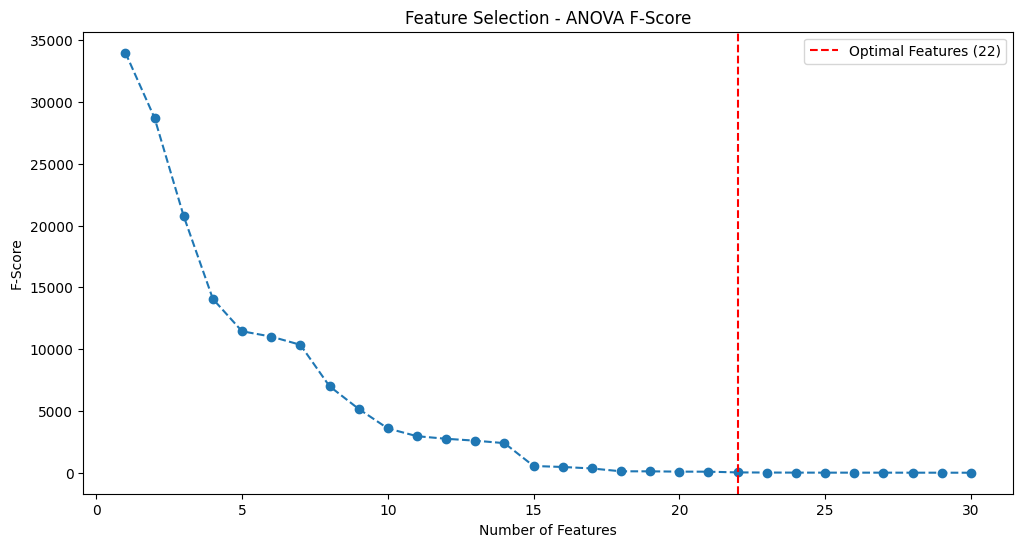

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(feature_scores)+1), feature_scores['F-Score'], marker='o', linestyle='dashed')
plt.xlabel("Number of Features")
plt.ylabel("F-Score")
plt.title("Feature Selection - ANOVA F-Score")
plt.axvline(x=22, color='r', linestyle='--', label='Optimal Features (22)')
plt.legend()
plt.show()


In [25]:
# Feature Selection using ANOVA (F-Test)
features = df.drop(columns=['Class', 'Time'])  # Removing target variable and Time
labels = df['Class']
selector = SelectKBest(score_func=f_classif, k=22)  # Selecting top 22 features
X_selected = selector.fit_transform(features, labels)
selected_features = features.columns[selector.get_support()]

print("Selected Features:", selected_features)
X = df[selected_features]
y = df['Class']

# Handling Class Imbalance using Hybrid Approach (Undersampling + SMOTE)
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Increase fraud cases to 50% of non-fraud cases
under = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # Reduce non-fraud cases
pipeline = Pipeline(steps=[('under', under), ('over', over)])
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))

Selected Features: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27', 'V28',
       'Hour'],
      dtype='object')

Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       984
           1       0.97      0.90      0.93       492

    accuracy                           0.96      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476

ROC AUC Score: 0.9420731707317074


/Users/ssatish/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/ssatish/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/Users/ssatish/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [26]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
# Cross-Validation Score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
cv_scores = cross_val_score(log_reg, X_resampled, y_resampled, cv=cv, scoring='roc_auc')
print("Cross-Validation ROC AUC Score: {:.4f}".format(cv_scores.mean()))


Cross-Validation ROC AUC Score: 0.9863


In [27]:

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       984
           1       1.00      0.95      0.97       492

    accuracy                           0.98      1476
   macro avg       0.99      0.97      0.98      1476
weighted avg       0.98      0.98      0.98      1476

ROC AUC Score: 0.9735772357723577


In [28]:

# Cross-Validation Score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
cv_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=cv, scoring='roc_auc')

In [29]:
print("Cross-Validation ROC AUC Score: {:.4f}".format(cv_scores.mean()))

Cross-Validation ROC AUC Score: 0.9980


In [30]:



# XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))


XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.99      0.98      0.98       492

    accuracy                           0.99      1476
   macro avg       0.99      0.99      0.99      1476
weighted avg       0.99      0.99      0.99      1476

ROC AUC Score: 0.9862804878048779


/Users/ssatish/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [21:10:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


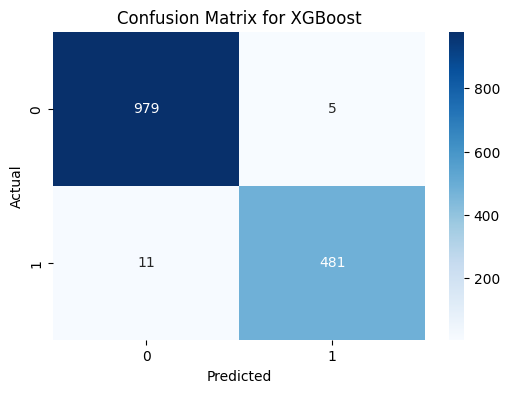

In [31]:


# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

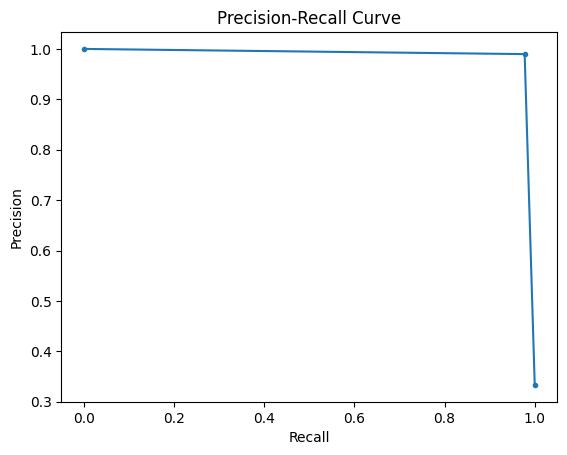

In [32]:


# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [33]:
precision,recall

(array([0.33333333, 0.98971193, 1.        ]),
 array([1.        , 0.97764228, 0.        ]))

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


In [35]:

print("\nK-Nearest Neighbors (KNN):")
print(classification_report(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_knn))


K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       984
           1       0.96      0.98      0.97       492

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476

ROC AUC Score: 0.9811991869918699


In [36]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# XGBoost Cross-Validation
xgb_cv_score = cross_val_score(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                               X_resampled, y_resampled, 
                               cv=cv, scoring='roc_auc').mean()

# KNN Cross-Validation
knn_cv_score = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                               X_resampled, y_resampled, 
                               cv=cv, scoring='roc_auc').mean()

print(f"XGBoost Cross-Validation ROC AUC Score: {xgb_cv_score:.4f}")
print(f"KNN Cross-Validation ROC AUC Score: {knn_cv_score:.4f}")


/Users/ssatish/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [21:10:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ssatish/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [21:10:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ssatish/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [21:10:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ssatish/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [21:10:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

XGBoost Cross-Validation ROC AUC Score: 0.9991
KNN Cross-Validation ROC AUC Score: 0.9966


In [37]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_clf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [38]:
feature_importance

,Feature,Importance
12,V14,0.645052
3,V4,0.047417
9,V10,0.044580
11,V12,0.031655
7,V8,0.025739
14,V17,0.020054
0,V1,0.017098
15,V18,0.015736
6,V7,0.015579
1,V2,0.015369


In [39]:
feature_importance.value_counts

<bound method DataFrame.value_counts of    Feature  Importance
12     V14    0.645052
3       V4    0.047417
9      V10    0.044580
11     V12    0.031655
7       V8    0.025739
14     V17    0.020054
0       V1    0.017098
15     V18    0.015736
6       V7    0.015579
1       V2    0.015369
20     V28    0.014440
5       V6    0.012011
16     V19    0.011685
21    Hour    0.011342
10     V11    0.011259
19     V27    0.010341
2       V3    0.010114
17     V20    0.009922
18     V21    0.008927
8       V9    0.008426
4       V5    0.006638
13     V16    0.006616>

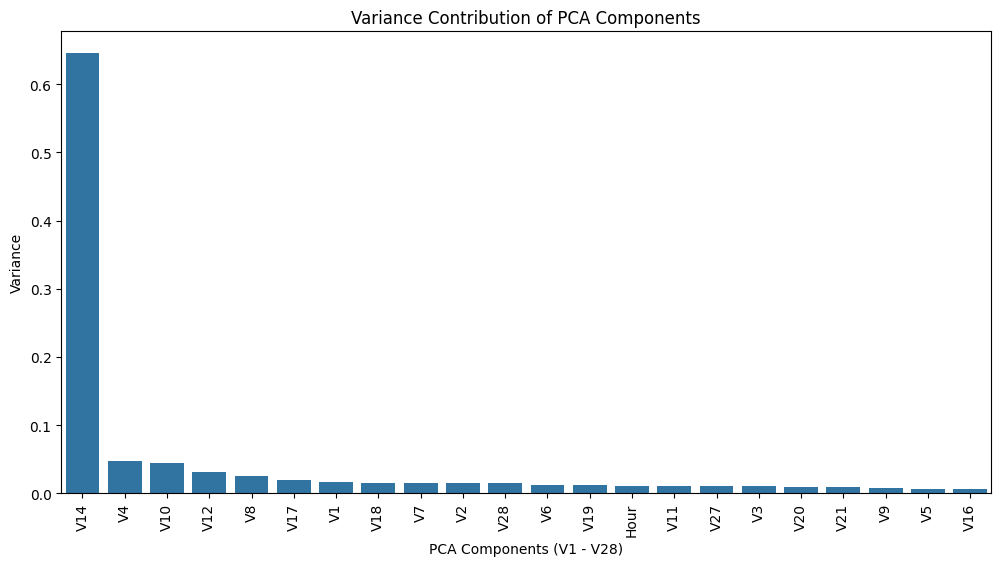

In [40]:

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Feature"].to_list(), y=feature_importance["Importance"])
plt.xticks(rotation=90)
plt.xlabel("PCA Components (V1 - V28)")
plt.ylabel("Variance")
plt.title("Variance Contribution of PCA Components")
plt.show()

In [41]:
feat=list(feature_importance[feature_importance["Importance"]>0.01]["Feature"])

In [42]:
feat1=feat

In [43]:
# XGBoost Classifier
xgb_clf1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf1.fit(X_train[feat], y_train)
y_pred_xgb1 = xgb_clf1.predict(X_test[feat])
print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb1))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb1))


XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.99      0.98      0.99       492

    accuracy                           0.99      1476
   macro avg       0.99      0.99      0.99      1476
weighted avg       0.99      0.99      0.99      1476

ROC AUC Score: 0.9883130081300812


/Users/ssatish/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [21:10:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [44]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train[feat].columns,
    'Importance': xgb_clf1.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [45]:
feature_importance

,Feature,Importance
0,V14,0.671724
1,V4,0.047008
2,V10,0.046554
4,V8,0.027484
5,V17,0.025812
3,V12,0.025475
6,V1,0.017880
7,V18,0.017591
8,V7,0.016777
9,V2,0.016207


In [46]:
feat=list(feature_importance[feature_importance["Importance"]>0.01]["Feature"])

In [47]:
# XGBoost Classifier
xgb_clf2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf2.fit(X_train[feat], y_train)
y_pred_xgb2 = xgb_clf2.predict(X_test[feat])
print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb2))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb2))

/Users/ssatish/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [21:10:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.98      0.98      0.98       492

    accuracy                           0.99      1476
   macro avg       0.99      0.99      0.99      1476
weighted avg       0.99      0.99      0.99      1476

ROC AUC Score: 0.9878048780487805


In [48]:
feat

['V14',
 'V4',
 'V10',
 'V8',
 'V17',
 'V12',
 'V1',
 'V18',
 'V7',
 'V2',
 'V19',
 'Hour',
 'V28',
 'V3',
 'V27',
 'V6']

In [49]:
len(feat)

16

In [51]:
# XGBoost Classifier
xgb_clf1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf1.fit(X_train[feat1], y_train)
y_pred_xgb1 = xgb_clf1.predict(X_test[feat1])
print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb1))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb1))


XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.99      0.98      0.99       492

    accuracy                           0.99      1476
   macro avg       0.99      0.99      0.99      1476
weighted avg       0.99      0.99      0.99      1476

ROC AUC Score: 0.9883130081300812


/Users/ssatish/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [21:11:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [52]:
feat1

['V14',
 'V4',
 'V10',
 'V12',
 'V8',
 'V17',
 'V1',
 'V18',
 'V7',
 'V2',
 'V28',
 'V6',
 'V19',
 'Hour',
 'V11',
 'V27',
 'V3']

In [54]:
import pickle
# Save the model as a pickle file
with open("xgboost_model.pkl", "wb") as model_file:
    pickle.dump(xgb_clf1, model_file)

print("Model training complete. XGBoost model saved as xgboost_model.pkl")

Model training complete. XGBoost model saved as xgboost_model.pkl


In [56]:
# Save Model and Selected Features as a dictionary
model_data = {
    "model": xgb_clf1,
    "features": selected_features
}

with open("xgboost_model.pkl", "wb") as model_file:
    pickle.dump(model_data, model_file)

print(" Model trained and saved successfully!")

 Model trained and saved successfully!
